# Data Science TP6
Tientso Ning

In [52]:
import numpy as np
from scipy.stats import norm
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Values taken from previous TP (with some corrections made):

H(U) = 0.625log(0.625) + 0.375log(0.375) = 0.9544

H(U|V) = 0.9512

H(W) = 1.0

H(W|U) = 0.4512

H(U|V,W) = 0.3443

I(U;V) = H(U) - H(U|V) = 0.9544 - 0.9512 = 0.0032

I(U;W) = H(W) - H(W|U) = 1.0 - 0.4512 = 0.5488

I(U;V,W) = H(U) - H(U|V,W) = 0.9544 - 0.3443 = 0.6101

# Binary Hypothesis Testing

### 1. General Idea
    a. H<sub>0</sub> : x[t] = w[t], where t is some time-step.
       H<sub>1</sub> : x[t] + A = w[t] + A, where A is our signal

    b. According to the approximation of the Q function (seen below), our minimum required sample is 4.

In [16]:
#Estimation of the Q-function
print(norm.sf(3)) #almost < 0.001
print(norm.sf(4)) #less than 0.001
N = 4

0.0013498980316300933
3.167124183311986e-05


### 2. Communications System

In [133]:
#try to estimate original x
def detection(channel):
    result = []
    for i in range(0, len(channel), 4):
        estimate = (channel[i]+channel[i+1]+channel[i+2]+channel[i+3])/4
        if estimate >= 0.5:
            result.append(1)
        else:
            result.append(0)
    return result

In [138]:
bit_sequence = np.random.randint(2, size=(10000,))
x = np.repeat(bit_sequence, N) #repeats each bit N times
z = np.random.randn(40000) #gaussian noise
y = np.add(x,z) #y output
x_hat = detection(y) #x_hat estimation

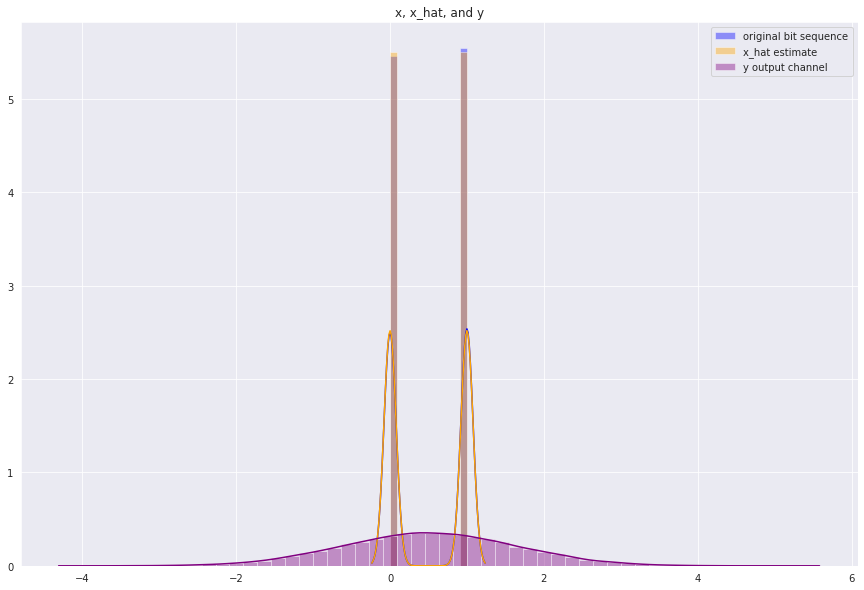

In [139]:
f = plt.figure(figsize=(15,10))
with sb.axes_style("darkgrid"):
    ax = sb.distplot(bit_sequence, color = 'blue', label="original bit sequence") #original bit sequence
    bx = sb.distplot(x_hat, color='orange', label="x_hat estimate") #x_hat estimate
    cx = sb.distplot(y, color='purple', label="y output channel") #y-output channel
    ax.set_title("x, x_hat, and y")
    ax.legend()

In [140]:
#comparing probility of miss and false acceptance
def compare(original, estimate):
    Pm = 0.0
    Pfa = 0.0
    
    for i in range(0, len(original)):
        if original[i] == estimate[i]:
            pass
        else:
            if original[i] == 0 and estimate[i] == 1:
                Pfa += 1
            elif original[i] == 1 and estimate[i] == 0:
                Pm += 1
                
    Pm = Pm/len(original)
    Pfa = Pfa/len(original)
    Pe = Pm+Pfa
    return Pm, Pfa, Pe 

In [141]:
prob_miss, prob_falseaccept, prob_e = compare(bit_sequence, x_hat)
print(prob_miss)
print(prob_falseaccept)
print(prob_e)

0.0774
0.0738
0.1512


Compared to the analytical values, these values for Probability of Miss, False Acceptance, and Error are much higher.

### 3. Neyman-Pearson Approach
    a. H<sub>0</sub> : x[t] = w[t], where t is some time-step
       H<sub>1</sub> : x[t] = A + w[t], where A is the signal
       Detection Rule = 

In [142]:
#plot the ROC-curve

# Multiple Hypothesis Testing